# PCA ggplot

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
import pyreadr
result = pyreadr.read_r('./data/decathlon2.rda')
X = result["decathlon2"]

In [3]:
from scientisttools import PCA
res_pca = PCA(standardize=True,n_components=None,ind_sup=list(range(23,X.shape[0])),quanti_sup=[10,11],quali_sup=12,parallelize=True)
res_pca.fit(X)

PCA(ind_sup=[23, 24, 25, 26], n_components=None, parallelize=True, quali_sup=12,
    quanti_sup=[10, 11])

## Individuals Factor Map

### RGB color

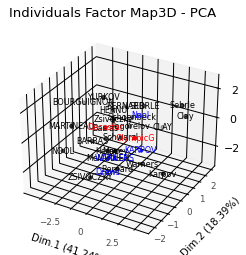

In [4]:
from scientisttools import fviz_pca3d_ind
p = fviz_pca3d_ind(res_pca)
print(p)

### Color by Cos2

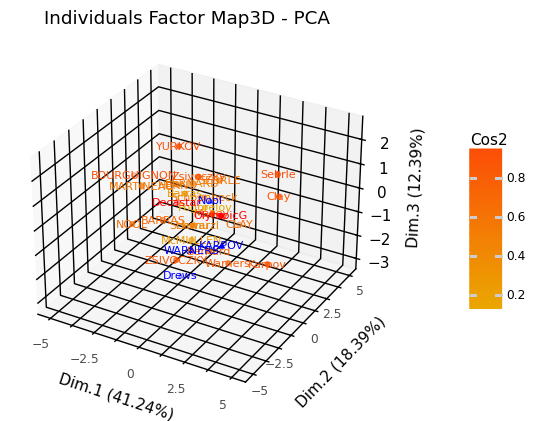

In [5]:
p = fviz_pca3d_ind(res_pca,color="cos2",repel=False,x_lim=(-5,5),y_lim=(-5,5))
print(p)

### Color by contrib

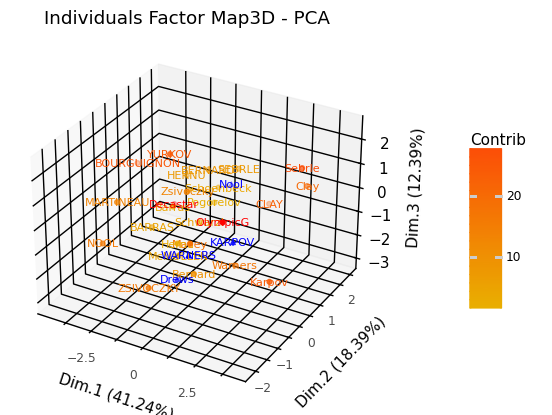

In [6]:
p = fviz_pca3d_ind(res_pca,color="contrib",repel=False)
print(p)

### Color by quantitatives columns

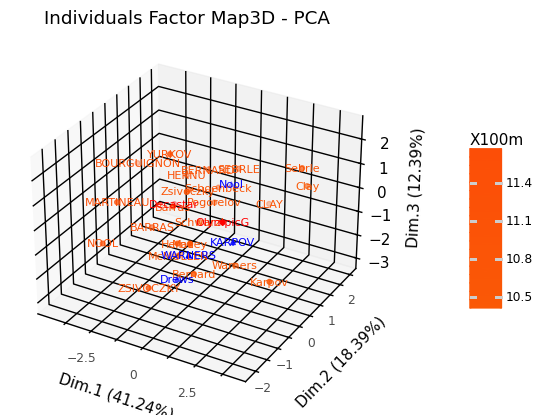

In [7]:
p = fviz_pca3d_ind(res_pca,color=X.columns.tolist()[0],repel=True)
print(p)

### Color by supplementary quantitatives columns

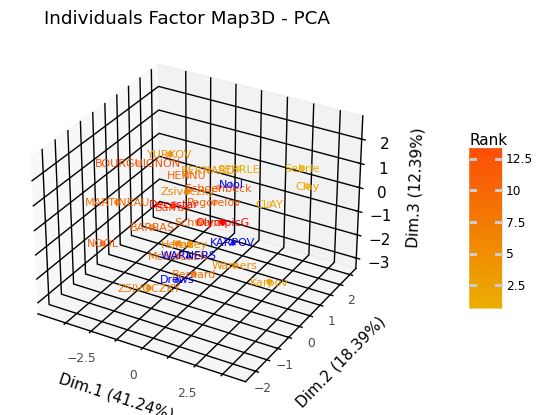

In [8]:
p = fviz_pca3d_ind(res_pca,color=X.columns.tolist()[10],repel=True)
print(p)

### Color by qualitatives columns

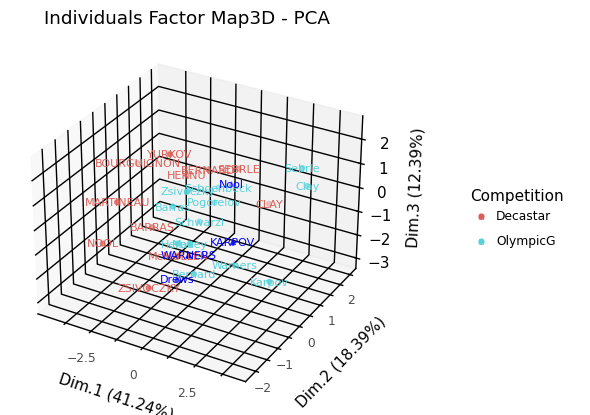

In [9]:
p = fviz_pca3d_ind(res_pca,habillage=X.columns.tolist()[-1],repel=True)
print(p)

### Color by numpy array

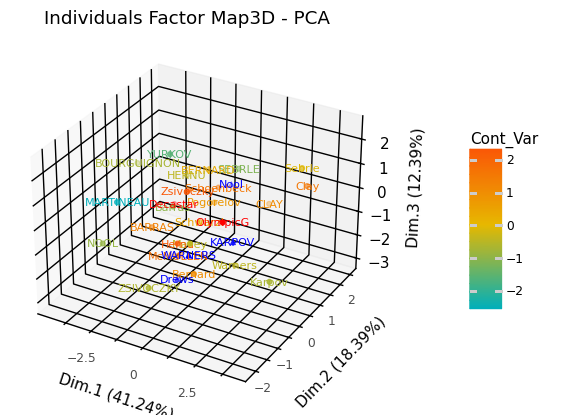

In [10]:
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_pca.call_["X"].shape[0])
p = fviz_pca3d_ind(res_pca,color=color_numpy,repel=True)
print(p)

### Color buy kmeans clustering

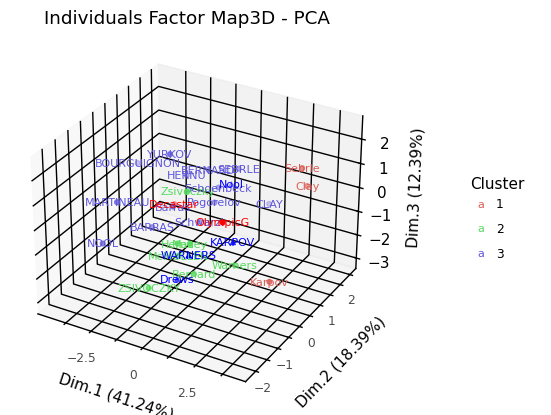

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_pca.ind_["coord"])
p = fviz_pca3d_ind(res_pca,color=kmeans,repel=True)
print(p)

### Set limits

#### limit with cos2

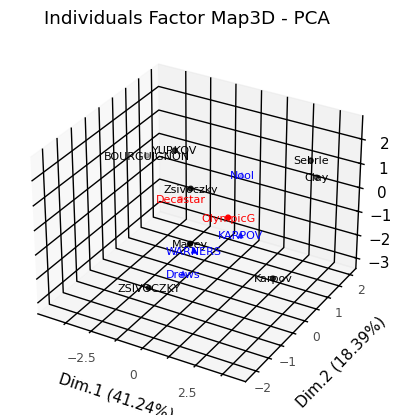

In [12]:
p = fviz_pca3d_ind(res_pca,lim_cos2=0.8,repel=True)
print(p)

#### Limit with contrib

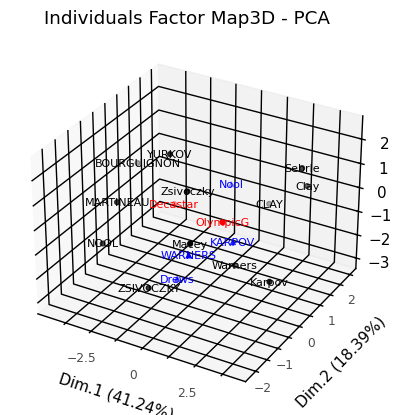

In [13]:
p = fviz_pca3d_ind(res_pca,lim_contrib=10,repel=True)
print(p)

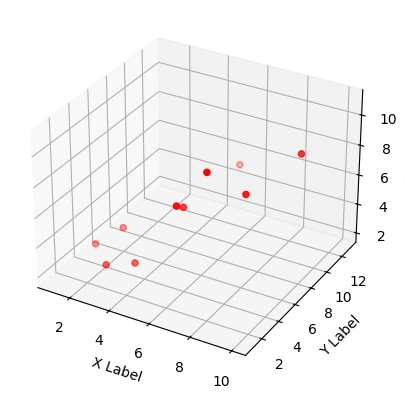

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()